<a href="https://colab.research.google.com/github/stevenvoo/fastai_courses/blob/master/basic_imagenette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Exercise (Imagenette)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

A quick introduction on the "Imagenette" dataset. This dataset consists of a subset of 10 easily classified classes from Imagenet: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute. The more detailed information on this dataset can be found here: https://github.com/fastai/imagenette

In [2]:
#download the datasets from fastai library

path = untar_data(URLs.IMAGENETTE)
path

PosixPath('/root/.fastai/data/imagenette')

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette/train'),
 PosixPath('/root/.fastai/data/imagenette/val')]

In [0]:
path_train = path/'train'
path_test = path/'val'

In [6]:
path_train.ls()
#fn_train = get_image_files(path_train)
#fn_train[:5]

[PosixPath('/root/.fastai/data/imagenette/train/n02979186'),
 PosixPath('/root/.fastai/data/imagenette/train/n03000684'),
 PosixPath('/root/.fastai/data/imagenette/train/n03425413'),
 PosixPath('/root/.fastai/data/imagenette/train/n01440764'),
 PosixPath('/root/.fastai/data/imagenette/train/n03417042'),
 PosixPath('/root/.fastai/data/imagenette/train/n03028079'),
 PosixPath('/root/.fastai/data/imagenette/train/n03394916'),
 PosixPath('/root/.fastai/data/imagenette/train/n03445777'),
 PosixPath('/root/.fastai/data/imagenette/train/n02102040'),
 PosixPath('/root/.fastai/data/imagenette/train/n03888257')]

In [10]:
# not JPG, PNG or other image file extensions, images are stored in each of those folders and the folders' names are actually the labels

data = ImageList.from_folder(path).split_by_folder(valid='val').label_from_folder().transform(size=224).databunch(bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (12894 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02979186,n02979186,n02979186,n02979186,n02979186
Path: /root/.fastai/data/imagenette;

Valid: LabelList (500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02979186,n02979186,n02979186,n02979186,n02979186
Path: /root/.fastai/data/imagenette;

Test: None

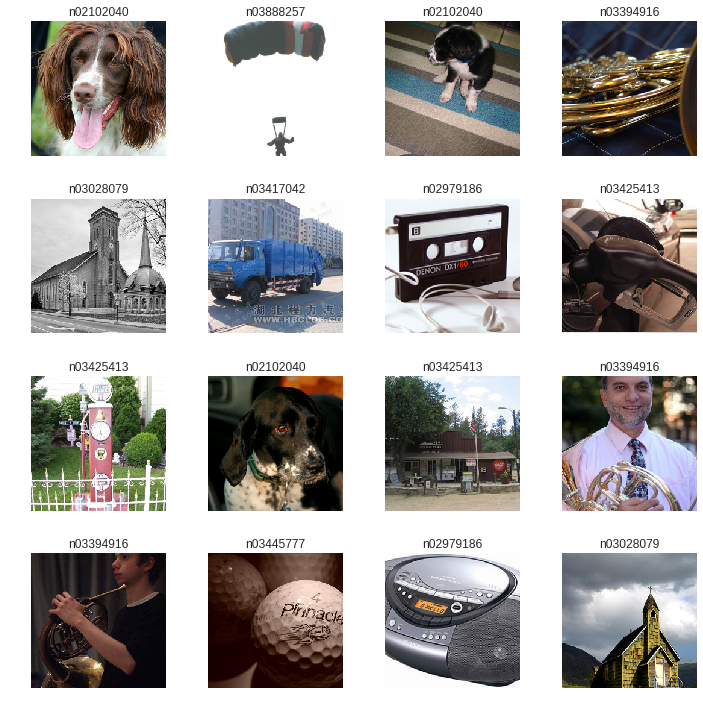

In [13]:
data.show_batch(rows=4, figsize=(10,10))

In [14]:
# to confirm there are only 10 classes ofimages

print(data.classes)
data.c

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


10

## Model Training

ResNet34 will be used as a baseline model. We will then fit on other pre-trained CNNs and fine tuning epochs and other parameters to see can the result be improved.

In [15]:
# deploy ResNet34 as a baseline model

learn = cnn_learner(data, models.resnet34, metrics = error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 94399241.40it/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.121034,0.033385,0.006000,03:17
1,0.063341,0.033645,0.010000,03:16
2,0.035367,0.031783,0.010000,03:16
3,0.022328,0.026206,0.008000,03:15
4,0.010917,0.024931,0.008000,03:16


The error rate is only 0.8%. That is a very high accuracy. 

In [0]:
# save the baseline model

learn.save("baseline")

## Results

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not.

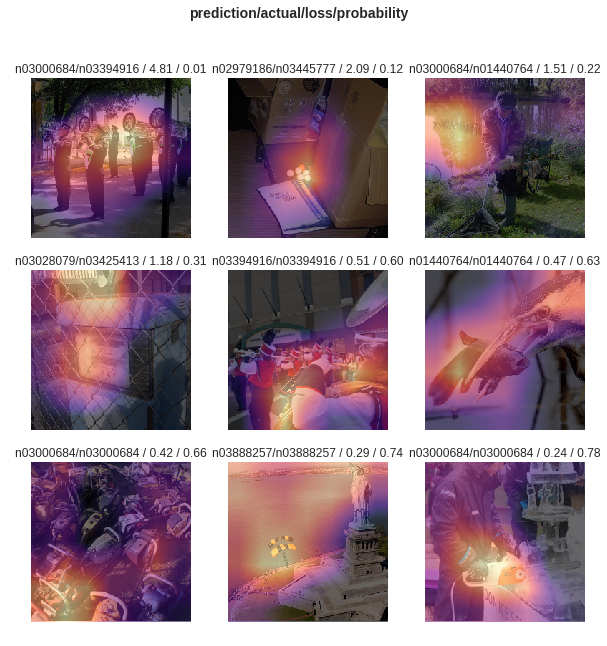

In [18]:
result = ClassificationInterpretation.from_learner(learn)
result.plot_top_losses(9, figsize=(10,10))

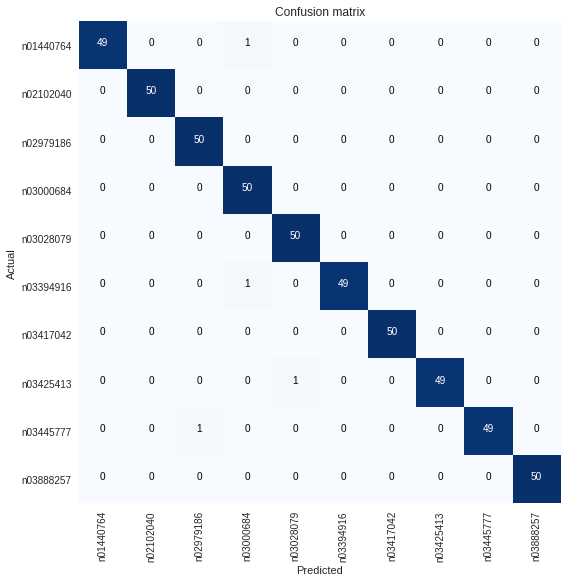

In [23]:
result.plot_confusion_matrix(figsize=(8,8))

From the confusion matrix, it is clear that the model is doing very well as it predicts almost all of the 500 objects correctly (out-of-sample).